# Data Exploration for Chicago Crime

## Download and Import Libaries

In [25]:
!pip install geodatasets

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import geopandas
import geodatasets

## Download, load, and inspect Data

In [27]:
!gdown https://drive.google.com/uc?id=1xuQkW1U3jAQ_OcoJZ53to3rdyhDhxS-f

Downloading...
From: https://drive.google.com/uc?id=1xuQkW1U3jAQ_OcoJZ53to3rdyhDhxS-f
To: /content/CrimeData
100% 15.5M/15.5M [00:00<00:00, 142MB/s]


In [28]:
# Load Data
file_path = 'CrimeData'
with open(file_path, 'rb') as file:
    data = pickle.load(file)

data

,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
0,13650227,JH491940,2024-11-01 00:00:00,089XX S LAFLIN ST,0560,ASSAULT,SIMPLE,RESIDENCE,False,True,...,21,73,08A,1167901,1845454,2024,2024-11-08 15:41:24,41.731462584,-87.660503907,"{'latitude': '41.731462584', 'longitude': '-87..."
1,13649850,JH491289,2024-11-01 00:00:00,003XX W OHIO ST,0810,THEFT,OVER $500,STREET,False,False,...,42,8,06,1174007,1904136,2024,2024-11-08 15:41:24,41.892358446,-87.636391922,"{'latitude': '41.892358446', 'longitude': '-87..."
2,13650185,JH491764,2024-11-01 00:00:00,015XX W CARROLL AVE,0820,THEFT,$500 AND UNDER,STREET,False,False,...,27,28,06,1166235,1902273,2024,2024-11-08 15:41:24,41.88741592,-87.664988379,"{'latitude': '41.88741592', 'longitude': '-87...."
3,13654954,JH497594,2024-11-01 00:00:00,043XX W MONTROSE AVE,0710,THEFT,THEFT FROM MOTOR VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,...,39,16,06,1146714,1928893,2024,2024-11-08 15:41:24,41.960858577,-87.735994826,"{'latitude': '41.960858577', 'longitude': '-87..."
4,13650108,JH491685,2024-11-01 00:00:00,048XX S MICHIGAN AVE,0460,BATTERY,SIMPLE,LIBRARY,False,False,...,3,38,08B,1177972,1873066,2024,2024-11-08 15:41:24,41.807010932,-87.622774469,"{'latitude': '41.807010932', 'longitude': '-87..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,12149588,JD348492,2020-08-28 16:30:00,0000X W ERIE ST,0820,THEFT,$500 AND UNDER,STREET,False,False,...,42,8,06,1176097,1904775,2020,2020-09-04 15:40:59,41.894065054,-87.628697034,"{'latitude': '41.894065054', 'longitude': '-87..."
49996,12152992,JD351499,2020-08-28 16:30:00,079XX S INGLESIDE AVE,0850,THEFT,ATTEMPT THEFT,RESIDENCE,False,False,...,8,44,06,1183939,1852562,2020,2020-09-04 15:40:59,41.750608654,-87.601529598,"{'latitude': '41.750608654', 'longitude': '-87..."
49997,12149625,JD348456,2020-08-28 16:30:00,055XX N CLARK ST,0820,THEFT,$500 AND UNDER,GROCERY FOOD STORE,False,False,...,40,77,06,1165024,1936693,2020,2020-09-04 15:40:59,41.981892081,-87.668455248,"{'latitude': '41.981892081', 'longitude': '-87..."
49998,12153330,JD352845,2020-08-28 16:30:00,027XX W 111TH ST,0620,BURGLARY,UNLAWFUL ENTRY,RESIDENCE,False,False,...,19,75,05,1160179,1830908,2020,2020-09-04 15:40:59,41.691708011,-87.689191338,"{'latitude': '41.691708011', 'longitude': '-87..."


# Dataset

- We have taken 50,000 datapoints for our experiments from the [Chicago Crime data](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2/about_data).

- Our dataset spans from 2024 to 2020, we choose data only till 2020 as we wanted to see the recent trends in crime.

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49049 entries, 0 to 49999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    49049 non-null  object        
 1   case_number           49049 non-null  object        
 2   date                  49049 non-null  datetime64[ns]
 3   block                 49049 non-null  object        
 4   iucr                  49049 non-null  object        
 5   primary_type          49049 non-null  object        
 6   description           49049 non-null  object        
 7   location_description  49049 non-null  object        
 8   arrest                49049 non-null  bool          
 9   domestic              49049 non-null  bool          
 10  beat                  49049 non-null  object        
 11  district              49049 non-null  object        
 12  ward                  49049 non-null  object        
 13  community_area       

In [30]:
print(data['date'].dt.to_period('M'))

0        2024-11
1        2024-11
2        2024-11
3        2024-11
4        2024-11
          ...   
49995    2020-08
49996    2020-08
49997    2020-08
49998    2020-08
49999    2020-08
Name: date, Length: 49049, dtype: period[M]


# Exploratory Data Analysis

## Temporal Trends of Crime

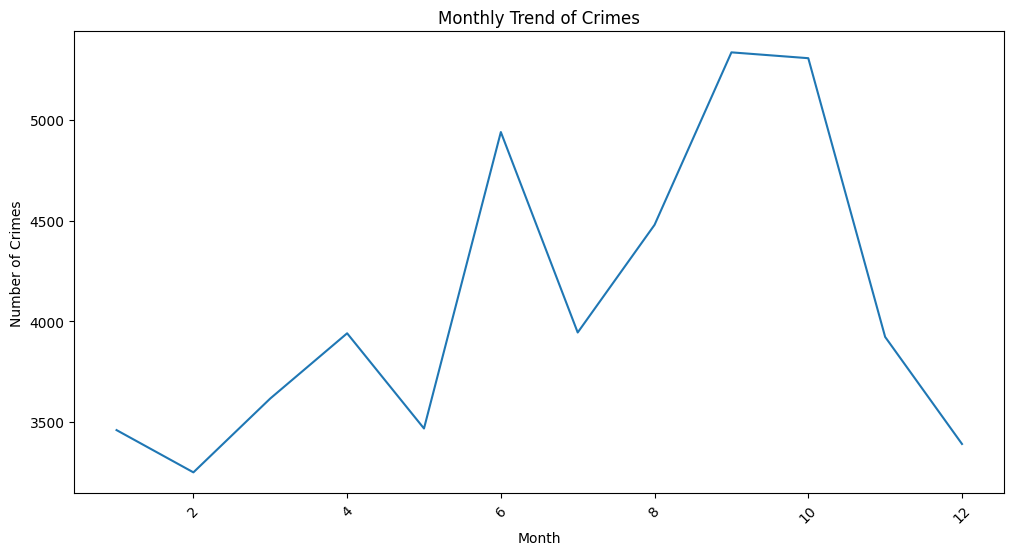

In [31]:
data['year_month'] = data['date'].dt.to_period('M')
data['month'] = data['year_month'].dt.month
monthly_trend = data.groupby('month').size()

# Monthly Trends
plt.figure(figsize=(12, 6))
monthly_trend.plot()
plt.title('Monthly Trend of Crimes')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()


# Comments

1. **Monthly Trend in Crime**: The data shows a distinct monthly pattern in crime rates.

2. **Lower Crime in Winter Months**: Crime rates are notably lower in January and February, likely due to the cold weather and snowfall, which discourage outdoor activity.

3. **Increase in Crime After February**: Crime rates begin to rise after February, indicating a shift as the weather warms.

4. **Peak Crime Months**: The crime rate peaks around October and November, aligning with an increase in outdoor activities during the fall.

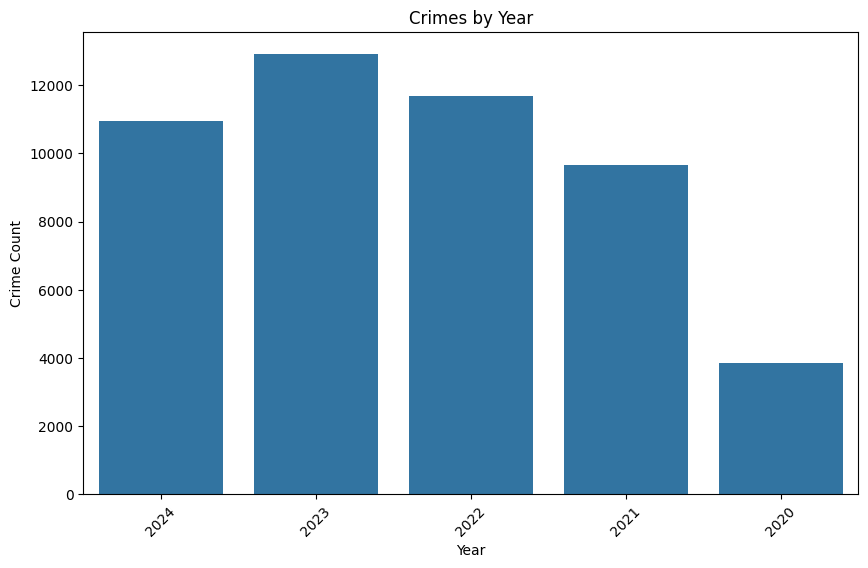

In [32]:
# Crime count by year
plt.figure(figsize=(10, 6))
sns.countplot(x='year', data=data)
plt.title('Crimes by Year')
plt.xlabel('Year')
plt.ylabel('Crime Count')
plt.xticks(rotation=45)
plt.show()


# Comments

1. **Yearly Trend in Crime**: The data reveals a noticeable yearly pattern in crime rates.

2. **Lowest Crime in 2020**: The crime rate was the lowest in 2020, likely due to the COVID-19 lockdowns, which forced people to stay at home, resulting in fewer opportunities for crime. Since then, crime rates have steadily increased.

3. **Peak in 2023**: Crime rates peaked in 2023, but there appears to be a decline in 2024, indicating a potential decrease in criminal activity.

<ipython-input-33-8116d6feefff>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='time_of_day', data=data, order=['Morning', 'Afternoon', 'Evening', 'Night'], palette='magma')


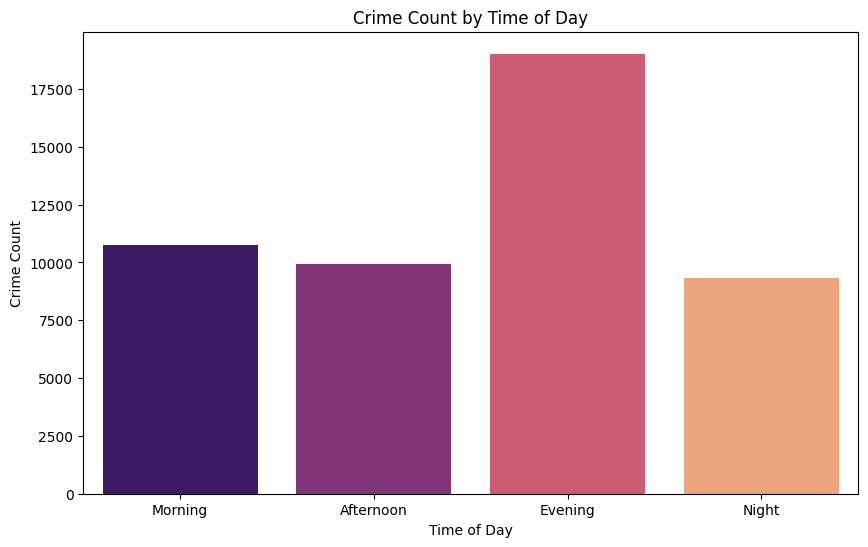

In [33]:
# Plot crime count by time of day
data['hour'] = data['date'].dt.hour
def categorize_time_of_day(hour):
    if 0 <= hour < 6:
        return 'Night'         # 12 am - 6 am
    elif 6 <= hour < 12:
        return 'Morning'       # 6 am - 12 pm
    elif 12 <= hour < 16:
        return 'Afternoon'     # 12 pm - 4 pm
    else:
        return 'Evening'       # 4 pm - 12 am

data['time_of_day'] = data['hour'].apply(categorize_time_of_day)
plt.figure(figsize=(10, 6))
sns.countplot(x='time_of_day', data=data, order=['Morning', 'Afternoon', 'Evening', 'Night'], palette='magma')
plt.title('Crime Count by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Crime Count')
plt.show()

# Comments

1. **Evening Crime Peak**: The data indicates that the majority of crimes occur between 4 pm and 12 am. This period aligns with post-work hours when people are more likely to be out in public or commuting, possibly explaining the higher crime rate.

2. **Consistent Crime Distribution During Other Hours**: For the rest of the day, crime rates are more evenly distributed, suggesting that while crimes occur throughout the day, they spike significantly in the evening.


## Categorical Inspection

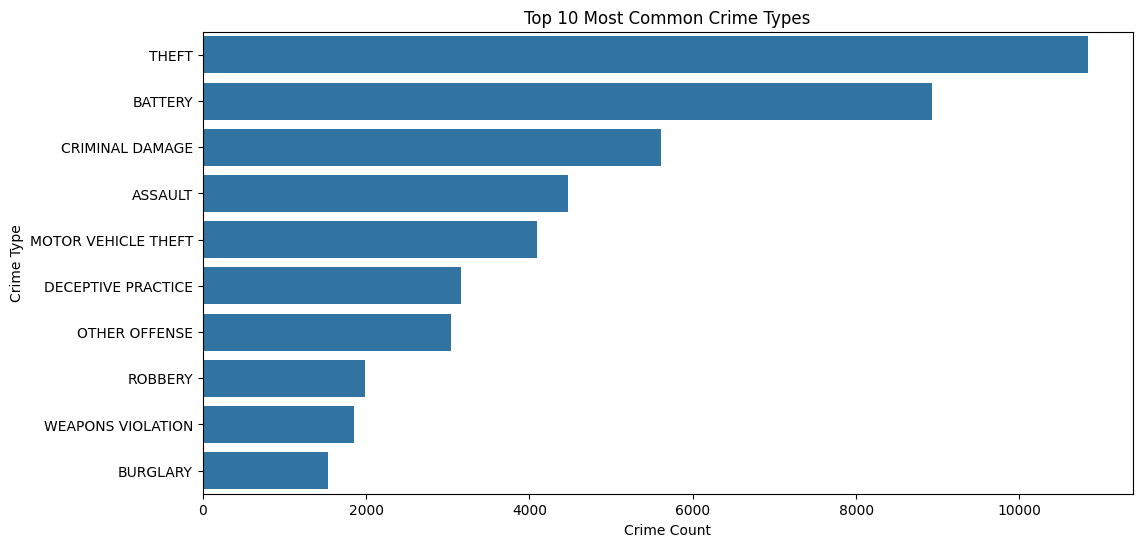

In [34]:
# Most common crime types
plt.figure(figsize=(12, 6))
sns.countplot(y='primary_type', data=data, order=data['primary_type'].value_counts().index[:10])
plt.title('Top 10 Most Common Crime Types')
plt.xlabel('Crime Count')
plt.ylabel('Crime Type')
plt.show()


# Comments

1. **Theft** is the most frequent crime in Chicago, significantly outnumbering other types, with over 10,000 recorded incidents. This suggests a high prevalence of property-related offenses in the city.

2. **Battery** and **Criminal Damage** follow as the second and third most common crime types, indicating issues with violent encounters and property destruction.

3. **Assault** and **Motor Vehicle Theft** are also prevalent, suggesting concerns around personal safety and vehicle security.
4. Lower-frequency crimes, such as **Robbery**, **Weapons Violations**, and **Burglary**, still have substantial counts, highlighting the diversity of criminal activity affecting residents.

5. **Deceptive Practice** and **Other Offenses** indicate a notable presence of fraud and various minor offenses that contribute to overall crime.


## Spatial Exploration

<Figure size 1000x800 with 0 Axes>

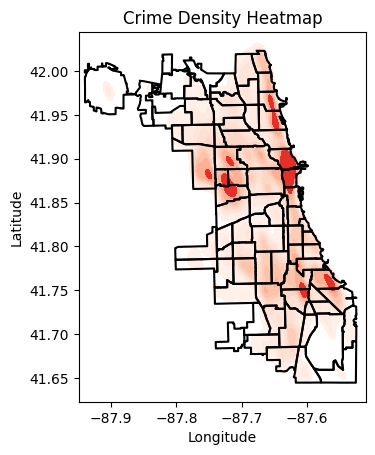

In [35]:
# Geospatial Analysis - Plot Crime Density Heatmap (requires 'latitude' and 'longitude' columns)
chicago = geopandas.read_file(geodatasets.get_path("geoda.chicago_commpop"))
data['longitude'] = data['longitude'].astype(float)
data['latitude'] = data['latitude'].astype(float)

plt.figure(figsize=(10, 8))
chicago.boundary.plot(color="black")
sns.kdeplot(data=data, x='longitude', y='latitude', fill=True, cmap='Reds', bw_adjust=0.5)
plt.title('Crime Density Heatmap')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

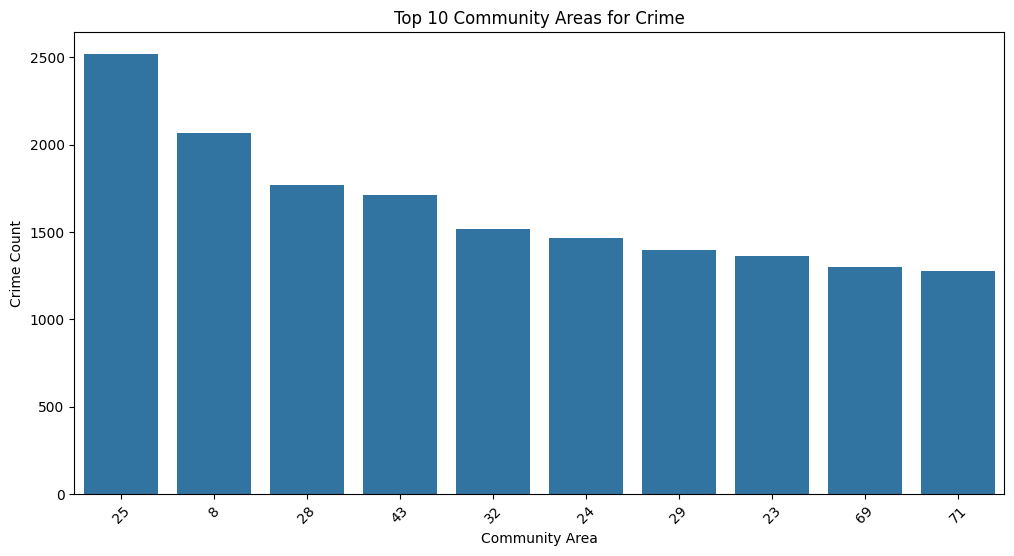

In [36]:
# Crime count by community area
plt.figure(figsize=(12, 6))
sns.countplot(x='community_area', data=data, order=data['community_area'].value_counts().index[:10])
plt.title('Top 10 Community Areas for Crime')
plt.xlabel('Community Area')
plt.ylabel('Crime Count')
plt.xticks(rotation=45)
plt.show()

# Comments

1. **High-Density Crime Areas**: The map shows concentrated red zones, indicating regions with a high density of criminal activity. These hotspots likely represent neighborhoods with heightened criminal occurrences and may need targeted interventions.

2. **Geographical Spread**: The heatmap reveals that while some areas have concentrated crime activity, other regions show much lower densities. This uneven distribution suggests that crime is more prevalent in specific zones rather than uniformly spread across the city.

3. **Latitude and Longitude Trends**: The most intense red areas appear between latitudes 41.75 to 42.00 and longitudes -87.80 to -87.55, signifying specific high-risk areas within Chicago that may correspond to socio-economic or infrastructural factors influencing crime rates.

4. **Community**: We see that a small number of communities are responsible for most for almost half of the crime.


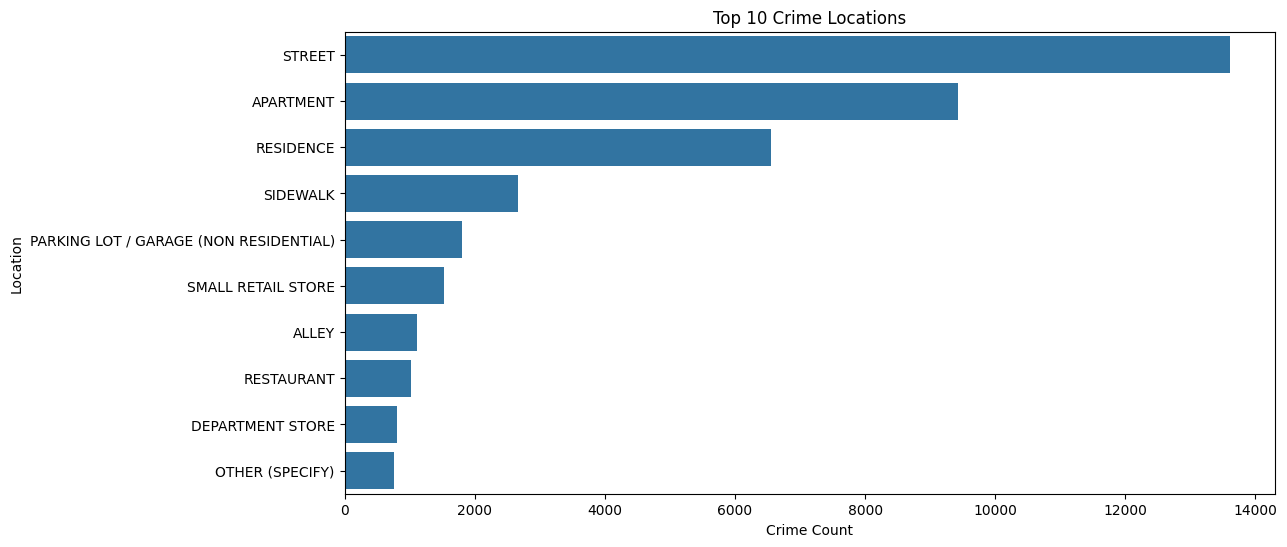

In [37]:
# Crime count by location description
plt.figure(figsize=(12, 6))
sns.countplot(y='location_description', data=data, order=data['location_description'].value_counts().index[:10])
plt.title('Top 10 Crime Locations')
plt.xlabel('Crime Count')
plt.ylabel('Location')
plt.show()

# Comments

1. **Street-Level Crime**: Streets are the most common crime locations, with a significantly higher count than any other category. This suggests that public areas may need increased surveillance or patrolling to enhance safety.

2. **Apartment and Residence Crimes**: Apartments and residences rank second and third, respectively, highlighting the need for enhanced residential security and community awareness programs to reduce crime in living spaces.

3. **Sidewalks and Parking Lots**: Sidewalks and non-residential parking lots also show notable crime counts, pointing to vulnerabilities in public and semi-public spaces where people might be more exposed.


## Quantitative Exploration

In [38]:
# Arrest rate analysis
arrest_rate = data['arrest'].value_counts(normalize=True) * 100
print("Arrest Rate (in %):")
print(arrest_rate)

Arrest Rate (in %):
arrest
False    87.347347
True     12.652653
Name: proportion, dtype: float64


In [39]:
# Domestic crime rate analysis
domestic_rate = data['domestic'].value_counts(normalize=True) * 100
print("Domestic Crime Rate (in %):")
print(domestic_rate)

Domestic Crime Rate (in %):
domestic
False    80.207548
True     19.792452
Name: proportion, dtype: float64


# Comments
1. We see that most of the time the suspect was not arrestted, which means they feld the scene, showing the need for authorities to respond more quickly.

2. We see that most of the crimes are non-domestic.

# Note

- We did not face a data sparsity problem as there was a large amount of data readily available.
- Due to the abundance of data, we dropped rows with NaN values and still retained 49,000 data points.